In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scores = {"RankSVM": 0.937,
          "RankNet": 0.927,
          "Logistic Regression": 0.924,
          "RankBoost": 0.821,
          "Baseline": 0.819}

for ranker, score in scores.items():
    change = 100 * (score - 0.819) / 0.819
    print("{ranker:15}: {change:+2.1f} %".format(ranker=ranker, change=change))

RankSVM        : +14.4 %
RankNet        : +13.2 %
Logistic Regression: +12.8 %
RankBoost      : +0.2 %
Baseline       : +0.0 %


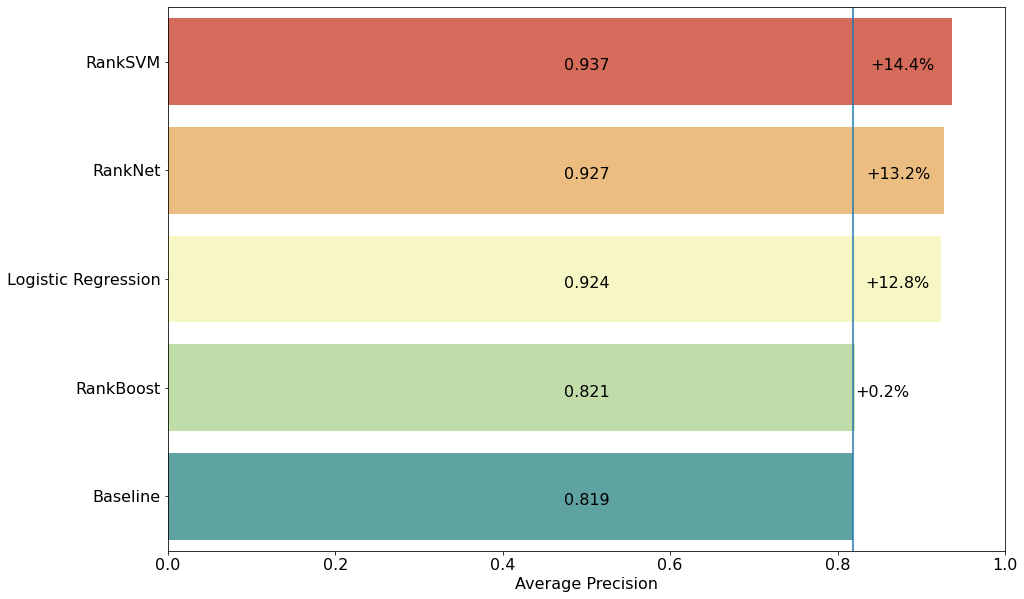

In [3]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_xlabel("Average Precision")
ax.set_xlim([0.0, 1.0])

chart = sns.barplot(x=list(scores.values()), y=list(scores.keys()), palette="Spectral")
plt.axvline(x=0.819)
for p in chart.patches:
    width = p.get_width()
    plt.text(0.5, p.get_y()+0.55*p.get_height(),
             '{:1.3f}'.format(width),
             ha='center', va='center')
    change = 100 * (width - 0.819) / 0.819
    if change > 0.0:
        if change > 10.0:
            plt.text(width - 0.5 *(width - 0.819), p.get_y()+0.55*p.get_height(),
                     '{:+2.1f}%'.format(change),
                     ha='center', va='center')
        else:
            plt.text(width, p.get_y()+0.55*p.get_height(),
                     '{:+2.1f}%'.format(change),
                     ha='left', va='center')
plt.savefig('ranking_scores.pdf', bbox_inches='tight')
plt.show()